In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.1 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

More Than One State Object

In [4]:
from modsim import State, TimeSeries, flip, decorate

def bike_to_wellesley(system):
    """Move a bike from Olin to Wellesley."""
    system.olin -= 1
    system.wellesley += 1

def bike_to_olin(system):
    """Move a bike from Wellesley to Olin."""
    system.wellesley -= 1
    system.olin += 1

def bike_breaks(system):
    """Simulate a bike breakdown."""
    if flip(0.1):  # Probability of a bike breaking down
        system.olin_broken += 1

def repair_bikes(system):
    """Simulate bike repairs."""
    if flip(0.2):  # Probability of a bike being repaired
        system.olin_broken -= 1

def check_out_bike(system):
    """Simulate a student checking out a bike."""
    if system.olin > 0 and not system.olin_broken:
        bike_to_wellesley(system)
        return True  # Bike successfully checked out
    else:
        return False  # Bike not available or broken

def step(system):
    """Simulate a time step."""
    bike_breaks(system)
    repair_bikes(system)

    if flip(0.5):
        check_out_bike(system)

    if flip(0.33):
        bike_to_olin(system)





In [5]:
def run_simulation(num_steps):
    """Run the bike share simulation for a given number of time steps."""
    system = State(olin=10, wellesley=2, olin_broken=0)
    results = TimeSeries()

    for i in range(num_steps):
        step(system)
        results[i+1] = system.olin

    return results

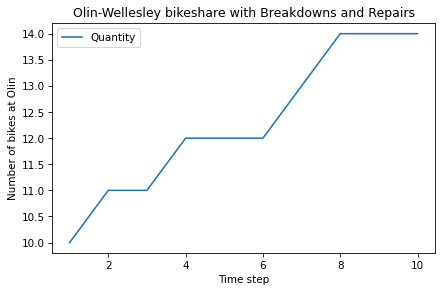

In [6]:
# Run the simulation for 10 time steps
results = run_simulation(10)

# Plot the results
results.plot()

# Decorate the plot
decorate(title='Olin-Wellesley bikeshare with Breakdowns and Repairs',
         xlabel='Time step',
         ylabel='Number of bikes at Olin')
